## This notebook accepts an image of a face, locates 15 keypoints using a trained Tensorflow model, and then places accessories on the face based upon the detected keypoint locations.
### The notebook can be used with the files from the github repository or in a colab environment with the datafiles in a google drive folder labeled "EPICProjectThree." 

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras.layers import Dropout, Flatten
from keras.models import load_model
from PIL import Image
import cv2
from __future__ import print_function #not sure if this is needed
!pip install -U -q PyDrive

Using TensorFlow backend.


In [0]:
target = 'dylanOriginal384x384.png'
eyeAccy = 'oakleys.png'
hatAccy = 'pirateHat.png'
noseAccy = 'pigNose2.png'
mouthAccy = 'pacifier.png'

In [447]:
####  FOR USE WITH GOOGLE COLAB  ####

# #This cell mounts your google drive to allow for fiel access and storage
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
####  FOR USE WITH GOOGLE COLAB  ####

# #here is an example of opening a file from your mounted google drive

# img = cv2.imread('drive/My Drive/EPICProjectThree/'+ target)
# # print (type(img))
# # print (img.shape)

In [ ]:
####  FOR USE IN GITHUB REPO  ####

img = cv2.imread('../../static/images/'+ target)

In [0]:
originalDimX=img.shape[0]
#print(originalDimX)
originalDimY=img.shape[1]
#print(originalDimY)

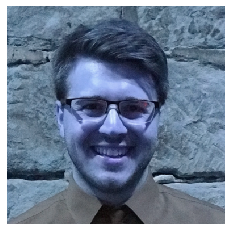

In [450]:
#taking a look at the image we read
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

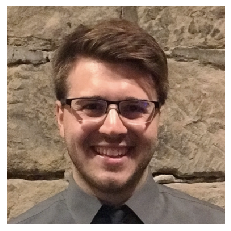

In [451]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

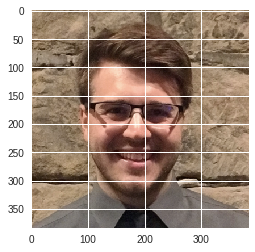

In [452]:
#To run the model on this image we need to crop to just the face

####  FOR USE WITH GOOGLE COLAB  ####
# face_cascade = cv2.CascadeClassifier('drive/My Drive/EPICProjectThree/haarcascade_frontalface_default.xml')

####  FOR USE IN GITHUB REPO  ####
face_cascade = cv2.CascadeClassifier('../colabFiles/EPICProjectThree/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# imgray = (255-gray)
plt.imshow(img, cmap = 'gray')

84 99 205 205


(-0.5, 383.5, 383.5, -0.5)

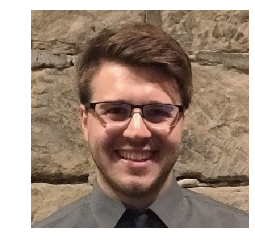

In [453]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    print(x,y,w,h)
plt.imshow(img)
plt.axis('off')

(-0.5, 204.5, 204.5, -0.5)

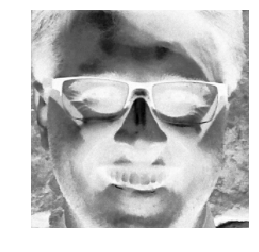

In [454]:
# cropping the image down to just the face that face_cascade detected
imgCropped = gray[y:y+h, x:x+w]
plt.imshow(imgCropped)
plt.axis('off')

In [0]:
#saving the dimensions of the cropped image and the crop distances
croppedDimX=imgCropped.shape[0]
#print(croppedDimX)
croppedDimY=imgCropped.shape[1]
#print(croppedDimX)
cropOffsetX = x
#print(cropOffsetX)
cropOffsetY = y
#print(cropOffsetY)

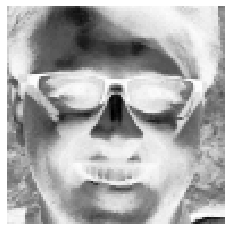

In [456]:
#resizing image to 96x96 for model prediction
imgCropped96 = cv2.resize(imgCropped, (96, 96))
plt.imshow(imgCropped96)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
#print(imgCropped96.shape)

#calculating the resizing ratios
ratioTo96x = 96/croppedDimX
ratioTo96y = 96/croppedDimY
#print(ratioTo96x)
#print(ratioTo96y)

In [457]:
#converting pixel data to 0-1 format for model
imgCropped96 = imgCropped96 / 255
imgCropped96.shape

(96, 96)

In [458]:
#To use the model we need to setup a pipeline for the output array

####  FOR USE WITH GOOGLE COLAB  ####
# df = pd.read_csv('drive/My Drive/EPICProjectThree/training.csv')

####  FOR USE IN GITHUB REPO  ####
df = pd.read_csv('../data/training.csv')

twoKGoodFaces = df.dropna()
y = np.vstack(twoKGoodFaces[twoKGoodFaces.columns[:-1]].values)
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [0]:
#loading the model that was trained to predict keypoints

####  FOR USE WITH GOOGLE COLAB  ####
# model = load_model('drive/My Drive/EPICProjectThree/tKeypointModel1227.h5')

####  FOR USE IN GITHUB REPO  ####
model = load_model('../colabFiles/EPICProjectThree/tKeypointModel1227.h5')

In [0]:
# Creating pipeline
output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)
y_train = output_pipe.fit_transform(y)

In [461]:
#making predictions for our target face
predictions = model.predict(imgCropped96[np.newaxis, :, :, np.newaxis])
predictions

predictions

array([[ 0.21286279,  0.4151616 , -0.05075968,  0.23472323,  0.2844637 ,
         0.2701267 ,  0.1551652 ,  0.2558472 ,  0.11039016,  0.32917792,
        -0.18663347,  0.01119414,  0.26374295,  0.32240796,  0.24906759,
         0.26062033,  0.31250805,  0.29781002, -0.2969478 ,  0.20933017,
         0.1333521 , -0.00042666, -0.10405476, -0.02238296, -0.06988263,
        -0.08720665, -0.06302793, -0.1566642 , -0.17371921,  0.16910495]],
      dtype=float32)

In [462]:
#converting the predictions to x,y coordinates
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
xy_predictions

array([[66.13623 , 39.61164 ],
       [30.110622, 37.86602 ],
       [59.27612 , 39.891502],
       [72.63411 , 40.945824],
       [36.98267 , 38.636154],
       [22.846933, 38.393295],
       [55.909206, 32.01525 ],
       [79.731895, 34.6639  ],
       [42.280594, 31.381256],
       [16.428396, 32.35213 ],
       [47.596973, 58.76822 ],
       [62.190506, 75.427086],
       [28.936327, 73.46414 ],
       [46.101357, 72.403946],
       [45.190002, 79.782394]], dtype=float32)

(-0.5, 95.5, 95.5, -0.5)

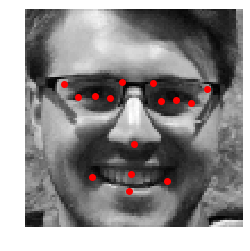

In [464]:
#taking a look at our predicted keypoints on our target face
plt.imshow(imgCropped96, cmap='gray')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'ro')
plt.axis('off')

In [0]:
#increasing the scale of the predicted keypoitn to the size of the original image after cropping
scaledUpPredictions = xy_predictions/ratioTo96x
#print(scaledUpPredictions)
#print(type(scaledUpPredictions))

In [0]:
#Adding offsets to scaled image to adjust for cropping
predictionsForOriginal = scaledUpPredictions + [cropOffsetX, cropOffsetY]
#print(predictionsForOriginal)


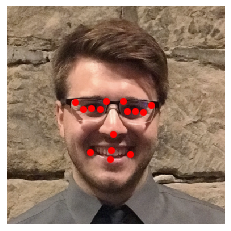

In [417]:
#putting the predicted keypoints on the original image
plt.imshow(img, cmap = 'gray')
plt.plot(predictionsForOriginal[:, 0], predictionsForOriginal[:, 1], 'ro')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

####  FOR USE WITH GOOGLE COLAB  ####
# plt.savefig('drive/My Drive/EPICProjectThree/keypointsOn'+target, format='png')

####  FOR USE IN GITHUB REPO  ####
# Establish filename starting with "KP"
filename = "KP_etc"
plt.savefig('../../static/images/' + filename, format='png')
plt.show()

## This section adds an eye location accessory to the photo based on the keypoint located in the previous sections


In [0]:
# These files are a 'workaround', 'trick', or 'hack' to get around the fact that when Pillow scales 
# a png image, it loses transparency. Invoking these functions on the image before and after a 'resize' 
# will retain transparency. See next cell for example use.

def premultiply(im):
    pixels = im.load()
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            r, g, b, a = pixels[x, y]
            if a != 255:
                r = r * a // 255
                g = g * a // 255
                b = b * a // 255
                pixels[x, y] = (r, g, b, a)

def unmultiply(im):
    pixels = im.load()
    for y in range(im.size[1]):
        for x in range(im.size[0]):
            r, g, b, a = pixels[x, y]
            if a != 255 and a != 0:
                r = 255 if r >= a else 255 * r // a
                g = 255 if g >= a else 255 * g // a
                b = 255 if b >= a else 255 * b // a
                pixels[x, y] = (r, g, b, a)

In [419]:
# Expect CSV file with accessory image file names in the first column and coordinates in other columns.

####  FOR USE WITH GOOGLE COLAB  ####
# imageFile = 'drive/My Drive/EPICProjectThree/accessoryKeypoints.csv'

####  FOR USE IN GITHUB REPO  ####
imageFile = '../colabFiles/EPICProjectThree/accessoryKeypoints.csv'
imagesDF = pd.read_csv(imageFile)
imagesDF

,file_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,redSunGlasses457x172.png,322.4403,71.0892,139.6395,71.0892,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,oakleys.png,400.0000,155.0000,190.0000,155.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pirateHat.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pigNose2.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230.0,240.0,440.0,420.0,40.0,420.0,NaN,NaN,NaN,NaN
4,pacifier.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,650.0,230.0,150.0,230.0,NaN,NaN,NaN,NaN


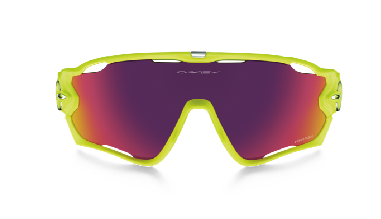

In [420]:
####  FOR USE WITH GOOGLE COLAB  ####
# imageDirectoryPath = 'drive/My Drive/EPICProjectThree/'

####  FOR USE IN GITHUB REPO  ####
imageDirectoryPath = '../colabFiles/EPICProjectThree/'

accessoryFileName = eyeAccy
accessoryFilePath = imageDirectoryPath + accessoryFileName
accessory = Image.open(accessoryFilePath)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

In [0]:
# Picking the row out of the datatable with the accessory info
accessoryRowDF = imagesDF.loc[imagesDF['file_name'] == accessoryFileName]


In [0]:
# Comparing the target face eye width (center to center) 
# and the accessory eye width (center to center) to determine the scaling factor to make the accessory fit the face
imageEyeWidth = predictionsForOriginal[0, 0]-predictionsForOriginal[1, 0]
#print("face eye width: ",imageEyeWidth)
accessoryEyeWidth = accessoryRowDF.iloc[0]["left_eye_center_x"]-accessoryRowDF.iloc[0]["right_eye_center_x"]
#print("accessory eye width: ", accessoryEyeWidth)
scaleFactorAcsy2Face = accessoryEyeWidth/imageEyeWidth
#print("Scale factor: " , scaleFactorAcsy2Face)

In [0]:
# Calculating the new accessory size and keypoint coordinates
newAcsySize = accessory.size/scaleFactorAcsy2Face
newAcsySize = newAcsySize.astype(int)
newAcsyLeftEyeCenterX = int(accessoryRowDF.iloc[0]["left_eye_center_x"]/scaleFactorAcsy2Face)
newAcsyRightEyeCenterX = int(accessoryRowDF.iloc[0]["right_eye_center_x"]/scaleFactorAcsy2Face)
newAcsyLeftEyeCenterY = int(accessoryRowDF.iloc[0]["left_eye_center_y"]/scaleFactorAcsy2Face)
newAcsyRightEyeCenterY = int(accessoryRowDF.iloc[0]["right_eye_center_y"]/scaleFactorAcsy2Face)
#print("new accessory dimensions: ",newAcsySize)
#print(newAcsyLeftEyeCenterX)
#print(newAcsyLeftEyeCenterY)
#print(newAcsyRightEyeCenterX)
#print(newAcsyRightEyeCenterY)

In [0]:
#Scaling the accessory image file with pre and post processing functions to maintain transparency
premultiply(accessory)
accessory = accessory.resize(newAcsySize)
unmultiply(accessory)
#print(accessory.format, accessory.size, accessory.mode)
accessory.show()

<function matplotlib.pyplot.show>

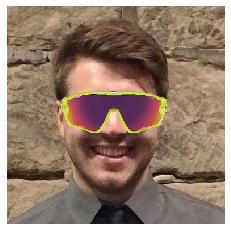

In [425]:
# pasting the resized, transparent png accessory image onto the test image

targetFaceFileName = target
targetFaceFilePath = imageDirectoryPath + targetFaceFileName
targetFace = Image.open(targetFaceFilePath)
x1 = int(predictionsForOriginal[1, 0])-newAcsyRightEyeCenterX
x2 = x1+newAcsySize[0]
y1 = int(predictionsForOriginal[1, 1])-newAcsyRightEyeCenterY
y2 = y1+newAcsySize[1]

#print(predictionsForOriginal[1, 0])
#print(newAcsyRightEyeCenterX)
#print(predictionsForOriginal[1, 1])
#print(newAcsyRightEyeCenterY)


box=(x1,y1,x2,y2)
targetFace.paste(accessory, box, accessory)
targetFace.show()
plt.imshow(targetFace)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

####  FOR USE WITH GOOGLE COLAB  ####
# plt.savefig('drive/My Drive/EPICProjectThree/eyeAccyOn'+target, format='png')

####  FOR USE IN GITHUB REPO  ####
# Establish filename starting with "KP"
filename = "KP_etc"
plt.savefig('../../static/images/' + filename + accessoryFileName, format='png')
plt.show

#print(box)


## This section adds a head accessory to the photo based on the eyebrow outer corner keypoints located in the previous sections


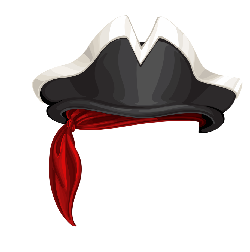

In [427]:
accessoryFileName = hatAccy
accessoryFilePath = imageDirectoryPath + accessoryFileName
accessory = Image.open(accessoryFilePath)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

In [0]:
# Picking the row out of the datatable with the accessory info
accessoryRowDF = imagesDF.loc[imagesDF['file_name'] == accessoryFileName]


In [0]:
# Comparing the target face eye brow width (outer corner to outer corner) 
# and the accessory eye brow width (outer corner to outer corner) to determine the scaling factor to make the accessory fit the face
imageBrowWidth = predictionsForOriginal[7, 0]-predictionsForOriginal[9, 0]
#print("face brow width: ",imageBrowWidth)
accessoryBrowWidth = accessoryRowDF.iloc[0]["left_eyebrow_outer_end_x"]-accessoryRowDF.iloc[0]["right_eyebrow_outer_end_x"]
#print("accessory Brow width: ", accessoryBrowWidth)
scaleFactorAcsy2Face = accessoryBrowWidth/imageBrowWidth
#print("Scale factor: " , scaleFactorAcsy2Face)

In [0]:
# Calculating the new accessory size and keypoint coordinates
newAcsySize = accessory.size/scaleFactorAcsy2Face
#print(newAcsySize)
newAcsySize = newAcsySize.astype(int)
newAcsyLeftOuterBrowX = int(accessoryRowDF.iloc[0]["left_eyebrow_outer_end_x"]/scaleFactorAcsy2Face)
newAcsyRightOuterBrowX = int(accessoryRowDF.iloc[0]["right_eyebrow_outer_end_x"]/scaleFactorAcsy2Face)
newAcsyLeftOuterBrowY = int(accessoryRowDF.iloc[0]["left_eyebrow_outer_end_y"]/scaleFactorAcsy2Face)
newAcsyRightOuterBrowY = int(accessoryRowDF.iloc[0]["right_eyebrow_outer_end_y"]/scaleFactorAcsy2Face)
#print("new accessory dimensions: ",newAcsySize)
#print("newAcsyLeftOuterBrowX:", newAcsyLeftOuterBrowX)
#print("newAcsyRightOuterBrowX:", newAcsyRightOuterBrowX)
#print("newAcsyLeftOuterBrowY:", newAcsyLeftOuterBrowY)
#print("newAcsyRightOuterBrowY:", newAcsyRightOuterBrowY)

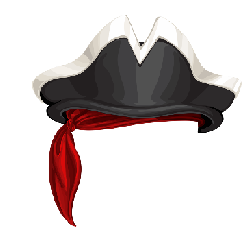

In [431]:
#Scaling the accessory image file with pre and post processing functions to maintain transparency
premultiply(accessory)
accessory = accessory.resize(newAcsySize)
unmultiply(accessory)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show>

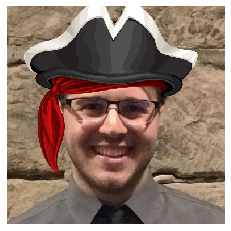

In [432]:
# pasting the resized, transparent png accessory image onto the test image

targetFaceFileName = target
targetFaceFilePath = imageDirectoryPath + targetFaceFileName
targetFace = Image.open(targetFaceFilePath)
x1 = int(predictionsForOriginal[9, 0])-newAcsyRightOuterBrowX

#print(predictionsForOriginal[9, 0])
#print(newAcsyRightOuterBrowX)

x2 = x1+newAcsySize[0]

#print(predictionsForOriginal[9, 1])
#print(newAcsyRightOuterBrowY)

y1 = int(predictionsForOriginal[9, 1])-newAcsyRightOuterBrowY
y2 = y1+newAcsySize[1]

box=(x1,y1,x2,y2)

#print(box)

targetFace.paste(accessory, box, accessory)
targetFace.show()
plt.imshow(targetFace)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

####  FOR USE WITH GOOGLE COLAB  ####
# plt.savefig('drive/My Drive/EPICProjectThree/hatAccyOn'+target, format='png')

####  FOR USE IN GITHUB REPO  ####
# Establish filename starting with "KP"
filename = "KP_etc"
plt.savefig('../../static/images/' + filename + accessoryFileName, format='png')
plt.show


## This section adds a nose accessory to the photo based on the nose tip and mouth corner keypoints located in the previous sections


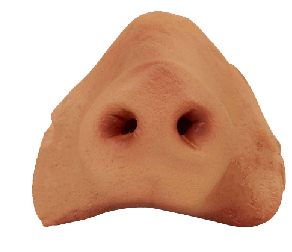

In [433]:
accessoryFileName = noseAccy
accessoryFilePath = imageDirectoryPath + accessoryFileName
accessory = Image.open(accessoryFilePath)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

In [0]:
# Picking the row out of the datatable with the accessory info
accessoryRowDF = imagesDF.loc[imagesDF['file_name'] == accessoryFileName]


In [0]:
# Comparing the target face eye brow width (outer corner to outer corner) 
# and the accessory eye brow width (outer corner to outer corner) to determine the scaling factor to make the accessory fit the face
imageMouthWidth = predictionsForOriginal[11, 0]-predictionsForOriginal[12, 0]
#print("face mouth width: ",imageMouthWidth)
accessoryMouthWidth = accessoryRowDF.iloc[0]["mouth_left_corner_x"]-accessoryRowDF.iloc[0]["mouth_right_corner_x"]
#print("accessory mouth width: ", accessoryMouthWidth)
scaleFactorAcsy2Face = accessoryMouthWidth/imageMouthWidth
#print("Scale factor: " , scaleFactorAcsy2Face)

In [0]:
# Calculating the new accessory size and keypoint coordinates
newAcsySize = accessory.size/scaleFactorAcsy2Face
#print(newAcsySize)
newAcsySize = newAcsySize.astype(int)
newAcsyLeftMouthCornerX = int(accessoryRowDF.iloc[0]["mouth_left_corner_x"]/scaleFactorAcsy2Face)
newAcsyRightMouthCornerX = int(accessoryRowDF.iloc[0]["mouth_right_corner_x"]/scaleFactorAcsy2Face)
newAcsyLeftMouthCornerY = int(accessoryRowDF.iloc[0]["mouth_left_corner_y"]/scaleFactorAcsy2Face)
newAcsyRightMouthCornerY = int(accessoryRowDF.iloc[0]["mouth_right_corner_y"]/scaleFactorAcsy2Face)
newAcsyNoseTipX = int(accessoryRowDF.iloc[0]["nose_tip_x"]/scaleFactorAcsy2Face)
newAcsyNoseTipY = int(accessoryRowDF.iloc[0]["nose_tip_y"]/scaleFactorAcsy2Face)
#print("new accessory dimensions: ",newAcsySize)
#print("newAcsyLeftMouthCornerX:", newAcsyLeftMouthCornerX)
#print("newAcsyRightMouthCornerX:", newAcsyRightMouthCornerX)
#print("newAcsyLeftMouthCornerY:", newAcsyLeftMouthCornerY)
#print("newAcsyRightMouthCornerY:", newAcsyRightMouthCornerY)
#print("newAcsyNoseTipX:", newAcsyNoseTipX)
#print("newAcsyNoseTipY:", newAcsyNoseTipY)

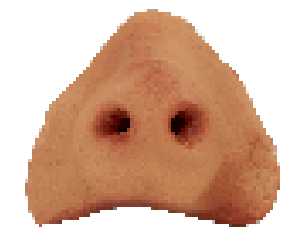

In [437]:
#Scaling the accessory image file with pre and post processing functions to maintain transparency
premultiply(accessory)
accessory = accessory.resize(newAcsySize)
unmultiply(accessory)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show>

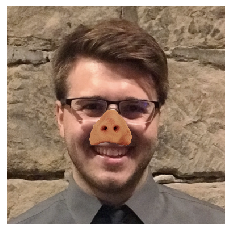

In [438]:
# pasting the resized, transparent png accessory image onto the test image

targetFaceFileName = target
targetFaceFilePath = imageDirectoryPath + targetFaceFileName
targetFace = Image.open(targetFaceFilePath)
x1 = int(predictionsForOriginal[10, 0])-newAcsyNoseTipX

#print(predictionsForOriginal[10, 0])
#print(newAcsyNoseTipX)

x2 = x1+newAcsySize[0]

#print(predictionsForOriginal[10, 1])
#print(newAcsyNoseTipY)

y1 = int(predictionsForOriginal[10, 1])-newAcsyNoseTipY
y2 = y1+newAcsySize[1]

box=(x1,y1,x2,y2)

#print(box)

targetFace.paste(accessory, box, accessory)
targetFace.show()
plt.imshow(targetFace)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

####  FOR USE WITH GOOGLE COLAB  ####
# plt.savefig('drive/My Drive/EPICProjectThree/noseAccyOn'+target, format='png')

####  FOR USE IN GITHUB REPO  ####
# Establish filename starting with "KP"
filename = "KP_etc"
plt.savefig('../../static/images/' + filename + accessoryFileName, format='png')
plt.show


## This section adds a mouth accessory to the photo based on the mouth corner keypoints located in the previous sections


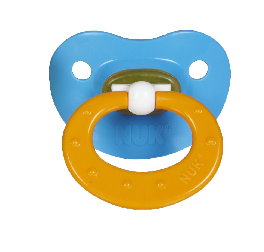

In [439]:
accessoryFileName = mouthAccy
accessoryFilePath = imageDirectoryPath + accessoryFileName
accessory = Image.open(accessoryFilePath)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

In [0]:
# Picking the row out of the datatable with the accessory info
accessoryRowDF = imagesDF.loc[imagesDF['file_name'] == accessoryFileName]


In [0]:
# Comparing the target face eye brow width (outer corner to outer corner) 
# and the accessory eye brow width (outer corner to outer corner) to determine the scaling factor to make the accessory fit the face
imageMouthWidth = predictionsForOriginal[11, 0]-predictionsForOriginal[12, 0]
#print("face mouth width: ",imageMouthWidth)
accessoryMouthWidth = accessoryRowDF.iloc[0]["mouth_left_corner_x"]-accessoryRowDF.iloc[0]["mouth_right_corner_x"]
#print("accessory mouth width: ", accessoryMouthWidth)
scaleFactorAcsy2Face = accessoryMouthWidth/imageMouthWidth
#print("Scale factor: " , scaleFactorAcsy2Face)

In [0]:
# Calculating the new accessory size and keypoint coordinates
newAcsySize = accessory.size/scaleFactorAcsy2Face
#print(newAcsySize)
newAcsySize = newAcsySize.astype(int)
newAcsyLeftMouthCornerX = int(accessoryRowDF.iloc[0]["mouth_left_corner_x"]/scaleFactorAcsy2Face)
newAcsyRightMouthCornerX = int(accessoryRowDF.iloc[0]["mouth_right_corner_x"]/scaleFactorAcsy2Face)
newAcsyLeftMouthCornerY = int(accessoryRowDF.iloc[0]["mouth_left_corner_y"]/scaleFactorAcsy2Face)
newAcsyRightMouthCornerY = int(accessoryRowDF.iloc[0]["mouth_right_corner_y"]/scaleFactorAcsy2Face)

#print("new accessory dimensions: ",newAcsySize)
#print("newAcsyLeftMouthCornerX:", newAcsyLeftMouthCornerX)
#print("newAcsyRightMouthCornerX:", newAcsyRightMouthCornerX)
#print("newAcsyLeftMouthCornerY:", newAcsyLeftMouthCornerY)
#print("newAcsyRightMouthCornerY:", newAcsyRightMouthCornerY)


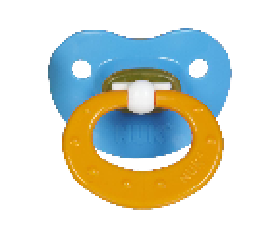

In [443]:
#Scaling the accessory image file with pre and post processing functions to maintain transparency
premultiply(accessory)
accessory = accessory.resize(newAcsySize)
unmultiply(accessory)
#print(accessory.format, accessory.size, accessory.mode)
plt.imshow(accessory)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show>

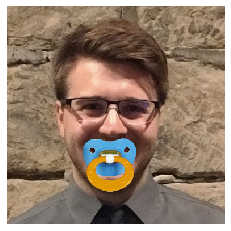

In [444]:
# pasting the resized, transparent png accessory image onto the test image

targetFaceFileName = target
targetFaceFilePath = imageDirectoryPath + targetFaceFileName
targetFace = Image.open(targetFaceFilePath)
x1 = int(predictionsForOriginal[12, 0])-newAcsyRightMouthCornerX

#print(predictionsForOriginal[12, 0])
#print(newAcsyRightMouthCornerX)

x2 = x1+newAcsySize[0]

#print(predictionsForOriginal[12, 1])
#print(newAcsyRightMouthCornerY)

y1 = int(predictionsForOriginal[12, 1])-newAcsyRightMouthCornerY
y2 = y1+newAcsySize[1]

box=(x1,y1,x2,y2)

#print(box)

targetFace.paste(accessory, box, accessory)
targetFace.show()
plt.imshow(targetFace)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
####  FOR USE WITH GOOGLE COLAB  ####
# plt.savefig('drive/My Drive/EPICProjectThree/mouthAccyOn'+target, format='png')

####  FOR USE IN GITHUB REPO  ####
# Establish filename starting with "KP"
filename = "KP_etc"
plt.savefig('../../static/images/' + filename + accessoryFileName, format='png')
plt.show
